In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/ebw_data.csv')

#Изучение данных

In [ ]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


<Axes: >

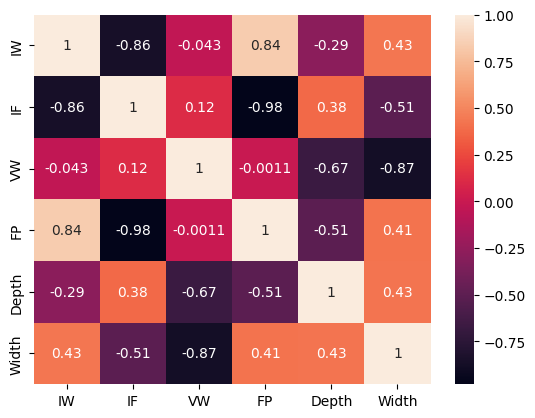

In [ ]:
sns.heatmap(df.corr(), annot=True)

Словарь терминов:
*   IW - величина сварочного тока
*   IF - ток фокусировки электронного пучка
*   VW - скорость сварки
*   FP - рассточние от поверхности образцов до электронно-оптической системы
*   Depth - глубина шва
*   Width - ширина шва


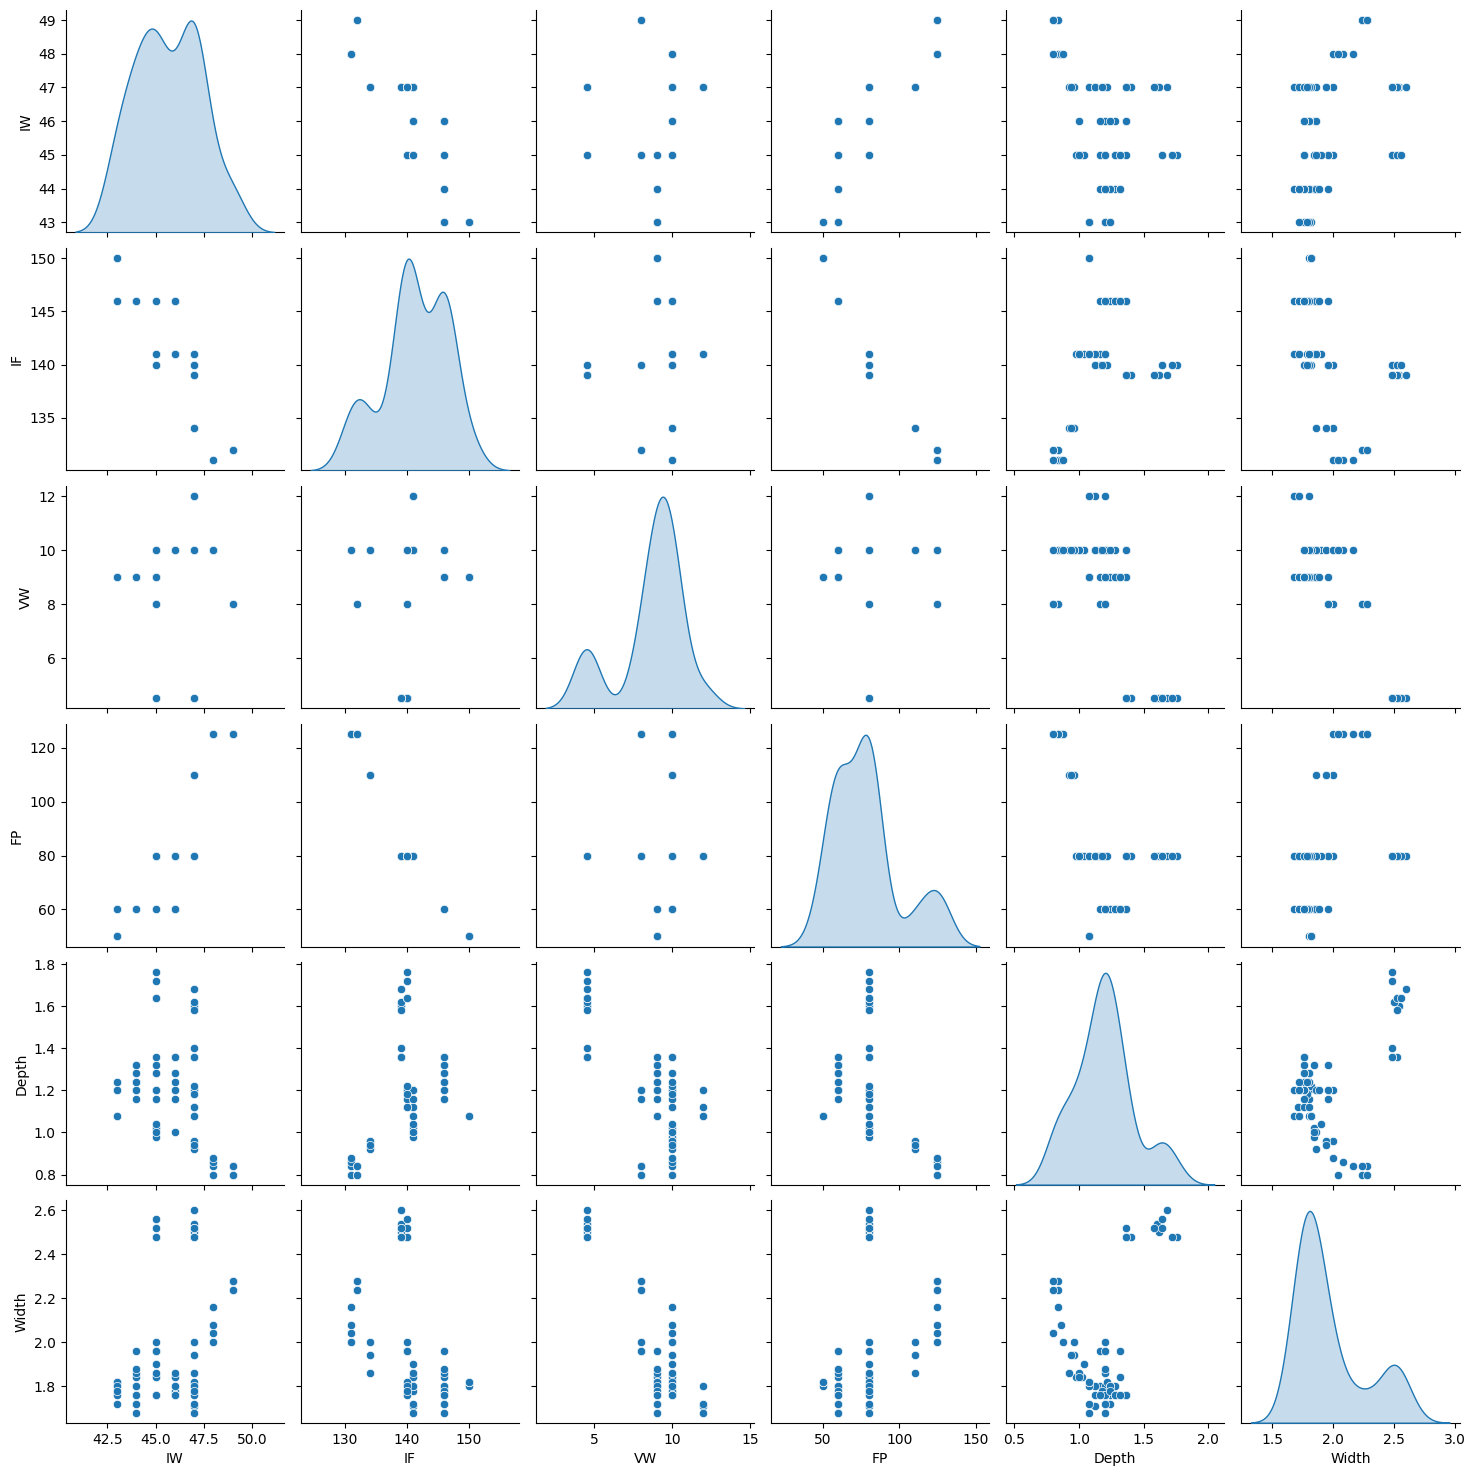

In [ ]:
sns.pairplot(df.head(100), diag_kind='kde')

#Подготовка датасета

In [ ]:
X = df.drop(["Width", "Depth"], axis=1)
y = df[["Width", "Depth"]].copy()

In [ ]:
X.describe()

,IW,IF,VW,FP
count,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333
std,1.678363,5.145763,2.061078,21.493530
min,43.000000,131.000000,4.500000,50.000000
25%,44.000000,139.000000,8.000000,60.000000
50%,45.500000,141.000000,9.000000,80.000000
75%,47.000000,146.000000,10.000000,80.000000
max,49.000000,150.000000,12.000000,125.000000


In [ ]:
y.describe()

,Width,Depth
count,72.000000,72.000000
mean,1.970417,1.195556
std,0.279040,0.225081
min,1.680000,0.800000
25%,1.760000,1.080000
50%,1.840000,1.200000
75%,2.050000,1.290000
max,2.600000,1.760000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

X_train.shape

(61, 4)

In [ ]:
X_test.shape

(11, 4)

#Линейная регрессия

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[ 0.02736397,  0.00354726, -0.11816029,  0.00453759],
       [ 0.02438946, -0.072408  , -0.05439517, -0.0240115 ]])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

In [ ]:
MAE

0.07933241385650544

In [ ]:
MSE

0.009766549515608553

In [ ]:
(1-MAE/y_train.mean())*100

Width    95.973644
Depth    93.350814
dtype: float64

In [ ]:
y_pred.mean(axis=0)

array([1.97204803, 1.20163051])

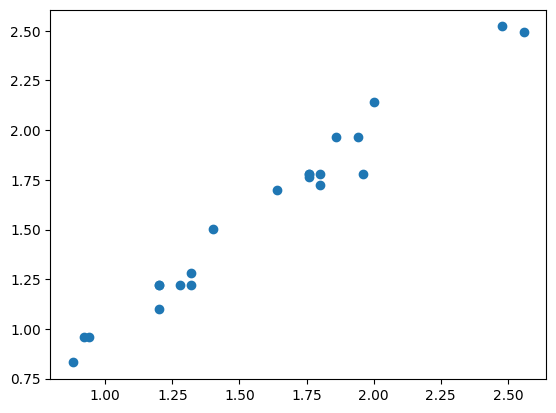

In [ ]:
plt.scatter(y_test, y_pred)

#Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=3)]

max_depth = [int(x) for x in np.linspace(5, 80, num=4)]

max_depth.append(None)
min_samples_leaf = [1, 3]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

{'n_estimators': [10, 55, 100],
 'max_depth': [5, 30, 55, 80, None],
 'min_samples_leaf': [1, 3]}

In [ ]:
rf_random = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=3)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, n_estimators=10;, score=0.911 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, n_estimators=10;, score=0.921 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, n_estimators=10;, score=0.912 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, n_estimators=10;, score=0.941 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=1, n_estimators=55;, score=0.916 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, n_estimators=55;, score=0.927 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, n_estimators=55;, score=0.905 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, n_estimators=55;, score=0.920 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, n_estimators=55;, score=0.944 total t

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'max_depth': [5, 30, 55, 80, None],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [10, 55, 100]},
             verbose=3)

In [ ]:
rf = rf_random.best_estimator_
rf

RandomForestRegressor(max_depth=5, n_estimators=55)

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

m = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
m

0.07158817431868095

In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

In [ ]:
MAE

0.057035772259152656

In [ ]:
MSE

0.0051248667022818495

In [ ]:
(1-MAE/y_train.mean())*100

Width    97.105265
Depth    95.219590
dtype: float64

In [ ]:
y_pred.mean(axis=0)

array([1.96748705, 1.20501851])

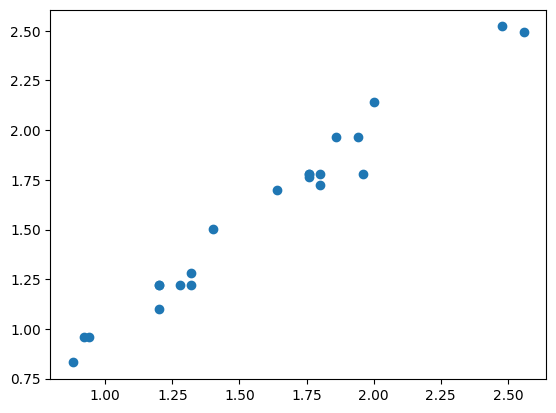

In [ ]:
plt.scatter(y_test, y_pred)